In [81]:
# Download necessary packages
#!python -m pip install yfinance
#!python -m pip install pandas
#!python -m pip install requests
#!python -m pip install bs4
#!python -m pip install plotly
#pip install chart-studio

In [82]:
#import required libraries
from chart_studio import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns

# Data Extraction

In [83]:
apple = yf.Ticker('AAPL')

In [84]:
apple_data = apple.history(period="max")

In [85]:
apple_data

Open        High         Low       Close  \
Date                                                                        
1980-12-12 00:00:00-05:00    0.099319    0.099750    0.099319    0.099319   
1980-12-15 00:00:00-05:00    0.094569    0.094569    0.094137    0.094137   
1980-12-16 00:00:00-05:00    0.087660    0.087660    0.087228    0.087228   
1980-12-17 00:00:00-05:00    0.089387    0.089818    0.089387    0.089387   
1980-12-18 00:00:00-05:00    0.091978    0.092410    0.091978    0.091978   
...                               ...         ...         ...         ...   
2023-11-22 00:00:00-05:00  191.490005  192.929993  190.830002  191.309998   
2023-11-24 00:00:00-05:00  190.869995  190.899994  189.250000  189.970001   
2023-11-27 00:00:00-05:00  189.919998  190.669998  188.899994  189.789993   
2023-11-28 00:00:00-05:00  189.779999  191.080002  189.399994  190.399994   
2023-11-29 00:00:00-05:00  190.899994  192.089996  188.970001  189.369995   

                              Volume  Dividends  Stock Splits  
Date                                                           
1980-12-12 00:00:00-05:00  469033600        0.0           0.0  
1980-12-15 00:00:00-05:00  175884800        0.0           0.0  
1980-12-16 00:00:00-05:00  105728000        0.0           0.0  
1980-12-17 00:00:00-05:00   86441600        0.0           0.0  
1980-12-18 00:00:00-05:00   73449600        0.0           0.0  
...                              ...        ...           ...  
2023-11-22 00:00:00-05:00   39617700        0.0           0.0  
2023-11-24 00:00:00-05:00   24048300        0.0           0.0  
2023-11-27 00:00:00-05:00   40552600        0.0           0.0  
2023-11-28 00:00:00-05:00   38415400        0.0           0.0  
2023-11-29 00:00:00-05:00   42967700        0.0           0.0  

[10832 rows x 7 columns]

# Exploratory Data Analysis

In [86]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10832 entries, 1980-12-12 00:00:00-05:00 to 2023-11-29 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10832 non-null  float64
 1   High          10832 non-null  float64
 2   Low           10832 non-null  float64
 3   Close         10832 non-null  float64
 4   Volume        10832 non-null  int64  
 5   Dividends     10832 non-null  float64
 6   Stock Splits  10832 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 677.0 KB


In [87]:
apple_data.reset_index(inplace=True)
apple_data.head(5)

Date      Open      High       Low     Close  \
0 1980-12-12 00:00:00-05:00  0.099319  0.099750  0.099319  0.099319   
1 1980-12-15 00:00:00-05:00  0.094569  0.094569  0.094137  0.094137   
2 1980-12-16 00:00:00-05:00  0.087660  0.087660  0.087228  0.087228   
3 1980-12-17 00:00:00-05:00  0.089387  0.089818  0.089387  0.089387   
4 1980-12-18 00:00:00-05:00  0.091978  0.092410  0.091978  0.091978   

      Volume  Dividends  Stock Splits  
0  469033600        0.0           0.0  
1  175884800        0.0           0.0  
2  105728000        0.0           0.0  
3   86441600        0.0           0.0  
4   73449600        0.0           0.0

In [88]:
apple_data.tail(5)

Date        Open        High         Low  \
10827 2023-11-22 00:00:00-05:00  191.490005  192.929993  190.830002   
10828 2023-11-24 00:00:00-05:00  190.869995  190.899994  189.250000   
10829 2023-11-27 00:00:00-05:00  189.919998  190.669998  188.899994   
10830 2023-11-28 00:00:00-05:00  189.779999  191.080002  189.399994   
10831 2023-11-29 00:00:00-05:00  190.899994  192.089996  188.970001   

            Close    Volume  Dividends  Stock Splits  
10827  191.309998  39617700        0.0           0.0  
10828  189.970001  24048300        0.0           0.0  
10829  189.789993  40552600        0.0           0.0  
10830  190.399994  38415400        0.0           0.0  
10831  189.369995  42967700        0.0           0.0

In [89]:
apple_data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [90]:
apple_data.head()

Date      Open      High       Low     Close     Volume
0 1980-12-12 00:00:00-05:00  0.099319  0.099750  0.099319  0.099319  469033600
1 1980-12-15 00:00:00-05:00  0.094569  0.094569  0.094137  0.094137  175884800
2 1980-12-16 00:00:00-05:00  0.087660  0.087660  0.087228  0.087228  105728000
3 1980-12-17 00:00:00-05:00  0.089387  0.089818  0.089387  0.089387   86441600
4 1980-12-18 00:00:00-05:00  0.091978  0.092410  0.091978  0.091978   73449600

In [91]:
print(f'Dataframe contains stock prices between {apple_data.Date.min()} {apple_data.Date.max()}') 
print(f'Total days={(apple_data.Date.max()  - apple_data.Date.min()).days} days')

Dataframe contains stock prices between 1980-12-12 00:00:00-05:00 2023-11-29 00:00:00-05:00
Total days=15692 days


In [92]:
apple_data.describe()

Open          High           Low         Close        Volume
count  10832.000000  10832.000000  10832.000000  10832.000000  1.083200e+04
mean      18.968746     19.178753     18.768161     18.982069  3.220041e+08
std       40.866749     41.327227     40.440700     40.904312  3.364833e+08
min        0.038432      0.038432      0.038000      0.038000  0.000000e+00
25%        0.240431      0.245682      0.234929      0.241206  1.164800e+08
50%        0.416042      0.422988      0.410094      0.417295  2.094580e+08
75%       16.371764     16.472877     16.219718     16.349911  4.018728e+08
max      195.717515    197.702207    194.760064    195.926956  7.421641e+09

In [93]:
apple_data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

# Data Visualisation

<AxesSubplot:>

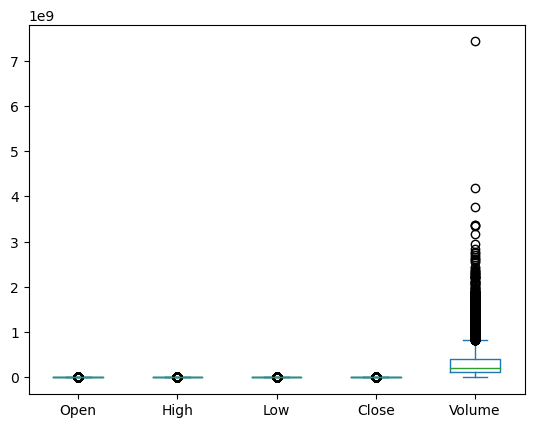

In [94]:
apple_data[['Open','High','Low','Close','Volume']].plot(kind='box')

In [95]:
#plotly figure prepration
#setting a layout for figure. will be used later again. 
layout = go.Layout(
    title='Stock Prices of Apple',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

#data to be plot
data_lst = [{'x':apple_data['Date'], 'y':apple_data['Close']}]
fig = go.Figure(data=data_lst, layout=layout)

In [96]:
#py.iplot(fig) #plotting online

iplot(fig) #plotting offline

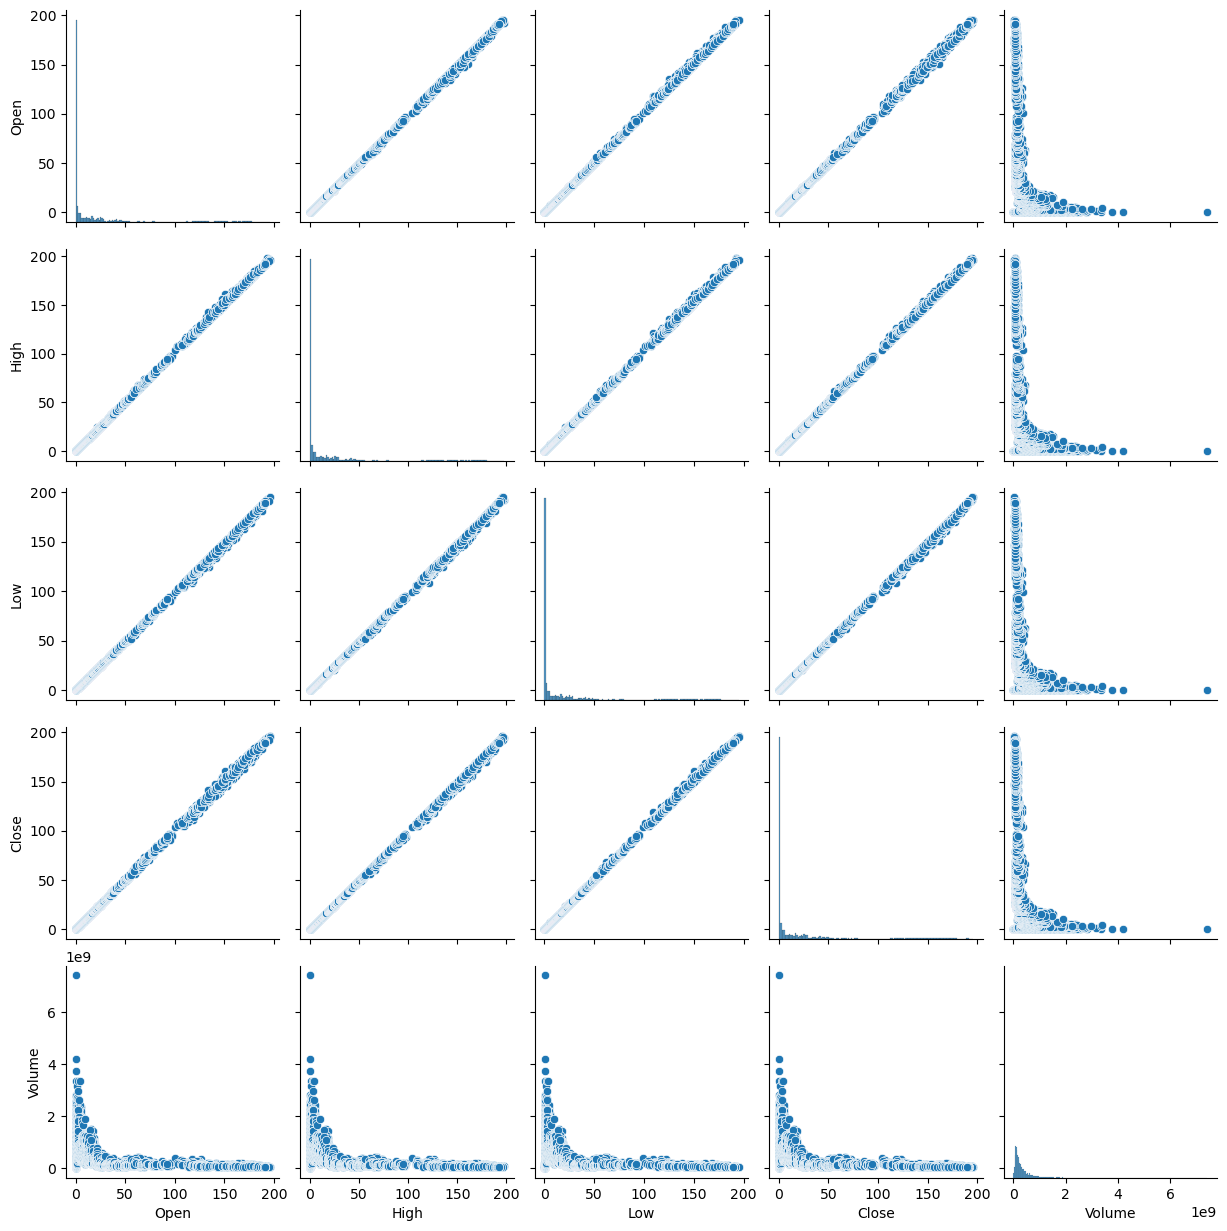

In [97]:
sns.pairplot(apple_data[['Open','High','Low','Close','Volume']])

# Regression for Stock Price Prediction

In [98]:
#For corss validation and hyper params selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [99]:
#spliting data into train and test sets
X = np.array(apple_data.index).reshape(-1,1)
Y = apple_data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [100]:
# For feature scaling
scaler = StandardScaler().fit(X_train)
#scaler.transform(...)

## 1. Simple Linear Regression (Without Scaling)

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import plotly.graph_objs as go

In [102]:
#creating a linear model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression()

In [103]:
#plotting actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lreg.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig2 = go.Figure(data=data_lst, layout=layout)

In [104]:
iplot(fig2)

In [105]:
mae_train = mean_absolute_error(Y_train, lreg.predict(X_train))
mae_test = mean_absolute_error(Y_test, lreg.predict(X_test))

In [106]:
#### calculating scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lreg.predict(X_train))}\t{r2_score(Y_test, lreg.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lreg.predict(X_train))}\t{mse(Y_test, lreg.predict(X_test))}
{'MAE'.ljust(10)}{mae_train}\t{mae_test}
'''
print(scores)


Metric           Train                Test        
r2_score  0.42767324994925415	0.4343993767221772
MSE       938.0990265900225	1022.2159760944746
MAE       22.038268179489	22.679738390793656



In [107]:
import plotly.graph_objs as go

# Assuming you have X_train, X_test, Y_train, Y_test defined

# Fit linear regression model
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

# Calculate metrics
r2_train = r2_score(Y_train, lreg.predict(X_train))*100
r2_test = r2_score(Y_test, lreg.predict(X_test))*100

mse_train = mean_squared_error(Y_train, lreg.predict(X_train))
mse_test = mean_squared_error(Y_test, lreg.predict(X_test))

mae_train = mean_absolute_error(Y_train, lreg.predict(X_train))
mae_test = mean_absolute_error(Y_test, lreg.predict(X_test))

# Create bar graph
metrics_names = ['r2_score x 100', 'MSE', 'MAE']
train_scores = [r2_train, mse_train, mae_train]
test_scores = [r2_test, mse_test, mae_test]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics_names,
    y=train_scores,
    name='Train',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    x=metrics_names,
    y=test_scores,
    name='Test',
    marker=dict(color='orange')
))

fig.update_layout(
    title='Model Performance Metrics - Train vs Test',
    xaxis=dict(title='Metrics', tickmode='array', tickvals=[0, 1, 2], ticktext=metrics_names),
    yaxis=dict(title='Score'),
    barmode='group'
)

# Display the plot
fig.show()


## 2. Simple Linear Regression (With Feature Scaling)

In [108]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
#model training
lreg_scaled = LinearRegression()
lreg_scaled.fit(X_train_scaled, Y_train)

LinearRegression()

In [110]:
mae_train_scaled = mean_absolute_error(Y_train, lreg_scaled.predict(X_train))
mae_test_scaled = mean_absolute_error(Y_test, lreg_scaled.predict(X_test))

In [111]:
#calculating scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lreg_scaled.predict(X_train_scaled))}\t{r2_score(Y_test, lreg_scaled.predict(X_test_scaled))}
{'MSE'.ljust(10)}{mse(Y_train, lreg_scaled.predict(X_train_scaled))}\t{mse(Y_test, lreg_scaled.predict(X_test_scaled))}
{'MAE'.ljust(10)}{mae_train_scaled}\t{mae_test_scaled}
'''
print(scores)


Metric           Train                Test        
r2_score  0.42767324994925415	0.4343993767221772
MSE       938.0990265900225	1022.2159760944746
MAE       143180.26604115503	144191.1626039061



In [112]:
iplot(fig2)

In [113]:
import plotly.graph_objs as go

# Assuming you have X_train, X_test, Y_train, Y_test defined

# Fit linear regression model
lreg_scaled = LinearRegression()
lreg_scaled.fit(X_train, Y_train)

# Calculate metrics
r2_train_scaled = r2_score(Y_train, lreg_scaled.predict(X_train))*100
r2_test_scaled = r2_score(Y_test, lreg_scaled.predict(X_test))*100

mse_train_scaled = mean_squared_error(Y_train, lreg.predict(X_train))
mse_test_scaled = mean_squared_error(Y_test, lreg.predict(X_test))

mae_train_scaled = mean_absolute_error(Y_train, lreg.predict(X_train))
mae_test_scaled = mean_absolute_error(Y_test, lreg.predict(X_test))

# Create bar graph
metrics_names = ['r2_score x 100', 'MSE', 'MAE']
train_scores = [r2_train, mse_train, mae_train]
test_scores = [r2_test, mse_test, mae_test]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics_names,
    y=train_scores,
    name='Train',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    x=metrics_names,
    y=test_scores,
    name='Test',
    marker=dict(color='orange')
))

fig.update_layout(
    title='Model Performance Metrics - Train vs Test',
    xaxis=dict(title='Metrics', tickmode='array', tickvals=[0, 1, 2], ticktext=metrics_names),
    yaxis=dict(title='Score'),
    barmode='group'
)

# Display the plot
fig.show()


## 3. Polynomial Regression (Degree=3)

In [114]:
import plotly.graph_objs as go
import plotly.subplots as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [115]:
#feature prepration 
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [116]:
#model training
lreg3 = LinearRegression()
lreg3.fit(X_train_poly, Y_train)

LinearRegression()

In [117]:
#calculating scores
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lreg3.predict(X_train_poly))}\t{r2_score(Y_test, lreg3.predict(X_test_poly))}
{'MSE'.ljust(10)}{mse(Y_train, lreg3.predict(X_train_poly))}\t{mse(Y_test, lreg3.predict(X_test_poly))}
{'MAE'.ljust(10)}{mae_train}\t{mae_test}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9106220854147999	0.9138212558511067
MSE       146.4990665971634	155.7517538757831
MAE       22.038268179489	22.679738390793656



In [118]:
#plotting actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lreg3.predict(X_train_poly).T,
    mode = 'markers',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig3 = go.Figure(data=data_lst, layout=layout)

In [119]:
iplot(fig3)

In [120]:
import plotly.graph_objs as go
import plotly.subplots as sp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming you have X_train, X_test, Y_train, Y_test defined

# Feature preparation
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Model training
lreg3 = LinearRegression()
lreg3.fit(X_train_poly, Y_train)

# Calculating scores
r2_train_poly = r2_score(Y_train, lreg3.predict(X_train_poly))*100
r2_test_poly = r2_score(Y_test, lreg3.predict(X_test_poly))*100

mse_train_poly = mean_squared_error(Y_train, lreg3.predict(X_train_poly))
mse_test_poly = mean_squared_error(Y_test, lreg3.predict(X_test_poly))

mae_train_poly = mean_absolute_error(Y_train, lreg3.predict(X_train_poly))
mae_test_poly = mean_absolute_error(Y_test, lreg3.predict(X_test_poly))

# Create bar graph
metrics_names = ['R-squared', 'MSE', 'MAE']
train_scores = [r2_train_poly, mse_train_poly, mae_train_poly]
test_scores = [r2_test_poly, mse_test_poly, mae_test_poly]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics_names,
    y=train_scores,
    name='Train',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    x=metrics_names,
    y=test_scores,
    name='Test',
    marker=dict(color='orange')
))

fig.update_layout(
    title='Model Performance Metrics - Polynomial Regression',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Score'),
    barmode='group'
)

# Display the plot
fig.show()


## 4. Ridge Regression + Polynomial Regression (with Date and Open Price as input features)

In [121]:
from sklearn.linear_model import Ridge

In [122]:
#spliting data into 
X = np.array([apple_data.index, apple_data['Open']]).T
Y = apple_data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#transforming input features
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


In [123]:
#training model
clf = Ridge(alpha=0.1)
clf.fit(X_train_poly, Y_train) 

/Users/harshsrivastava/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.05517e-28): result may not be accurate.



Ridge(alpha=0.1)

In [124]:
mae_train_ridge = mean_absolute_error(Y_train, clf.predict(X_train_poly))
mae_test_ridge = mean_absolute_error(Y_test, clf.predict(X_test_poly))

In [125]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, clf.predict(X_train_poly))}\t{r2_score(Y_test, clf.predict(X_test_poly))}
{'MSE'.ljust(10)}{mse(Y_train, clf.predict(X_train_poly))}\t{mse(Y_test, clf.predict(X_test_poly))}
{'MAE'.ljust(10)}{mae_train_ridge}\t{mae_test_ridge}
'''
print(scores)


Metric           Train                Test        
r2_score  0.9997185744526452	0.999766641883657
MSE       0.46886977880126113	0.3937041811804805
MAE       0.21560839637069776	0.20799328624251884



In [126]:
# plotting predicted and actual values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = clf.predict(X_train_poly).T,
    mode = 'markers',
    name = 'Predicted'
)
data_lst = [trace0,trace1]
layout.xaxis.title.text = 'Day'
fig3 = go.Figure(data=data_lst, layout=layout)

In [127]:
iplot(fig3)

In [128]:
import plotly.graph_objs as go
import plotly.subplots as sp
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Splitting data
X = np.array([apple_data.index, apple_data['Open']]).T
Y = apple_data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Transforming input features
poly = PolynomialFeatures(3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Training model
clf = Ridge(alpha=0.1)
clf.fit(X_train_poly, Y_train)

# Calculating scores
r2_train_ridge = r2_score(Y_train, clf.predict(X_train_poly))
r2_test_ridge = r2_score(Y_test, clf.predict(X_test_poly))

mse_train_ridge = mean_squared_error(Y_train, clf.predict(X_train_poly))
mse_test_ridge = mean_squared_error(Y_test, clf.predict(X_test_poly))

mae_train_ridge = mean_absolute_error(Y_train, clf.predict(X_train_poly))
mae_test_ridge = mean_absolute_error(Y_test, clf.predict(X_test_poly))

# Create bar graph
metrics_names = ['R-squared', 'MSE', 'MAE']
train_scores = [r2_train_ridge, mse_train_ridge, mae_train_ridge]
test_scores = [r2_test_ridge, mse_test_ridge, mae_test_ridge]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=metrics_names,
    y=train_scores,
    name='Train',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    x=metrics_names,
    y=test_scores,
    name='Test',
    marker=dict(color='orange')
))

fig.update_layout(
    title='Model Performance Metrics - Ridge Regression',
    xaxis=dict(title='Metrics'),
    yaxis=dict(title='Score'),
    barmode='group'
)

# Display the plot
fig.show()


/Users/harshsrivastava/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.05517e-28): result may not be accurate.



# Comparing all the models

In [129]:
import plotly.graph_objs as go

# Assuming you have calculated scores for all models as shown in the provided code

# Define the models and their corresponding scores
models = ['Linear Regression', 'Scaled Linear Regression', 'Polynomial Regression', 'Ridge Regression']
r2_train_scores = [r2_train, r2_train_scaled, r2_train_poly, r2_train_ridge]
r2_test_scores = [r2_test, r2_test_scaled, r2_test_poly, r2_test_ridge]

mse_train_scores = [mse_train, mse_train_scaled, mse_train_poly, mse_train_ridge]
mse_test_scores = [mse_test, mse_test_scaled, mse_test_poly, mse_test_ridge]

mae_train_scores = [mae_train, mae_train_scaled, mae_train_poly, mae_train_ridge]
mae_test_scores = [mae_test, mae_test_scaled, mae_test_poly, mae_test_ridge]

# Define custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# Create bar positions
bar_width = 0.2
bar_positions_train = [i for i in range(len(models))]
bar_positions_test = [i + bar_width for i in bar_positions_train]
bar_positions_train_mse = [i + 2 * bar_width for i in bar_positions_train]
bar_positions_test_mse = [i + 3 * bar_width for i in bar_positions_train]

# Plotting
fig = go.Figure()

# R-squared scores
fig.add_trace(go.Bar(
    x=bar_positions_train,
    y=r2_train_scores,
    width=bar_width,
    name='R-squared Train',
    marker=dict(color=colors[0])
))

fig.add_trace(go.Bar(
    x=bar_positions_test,
    y=r2_test_scores,
    width=bar_width,
    name='R-squared Test',
    marker=dict(color=colors[1])
))

# MSE scores
fig.add_trace(go.Bar(
    x=bar_positions_train_mse,
    y=mse_train_scores,
    width=bar_width,
    name='MSE Train',
    marker=dict(color=colors[2])
))

fig.add_trace(go.Bar(
    x=bar_positions_test_mse,
    y=mse_test_scores,
    width=bar_width,
    name='MSE Test',
    marker=dict(color=colors[3])
))

# MAE scores
fig.add_trace(go.Bar(
    x=bar_positions_train_mse,
    y=mae_train_scores,
    width=bar_width,
    name='MAE Train',
    marker=dict(color=colors[4])
))

fig.add_trace(go.Bar(
    x=bar_positions_test_mse,
    y=mae_test_scores,
    width=bar_width,
    name='MAE Test',
    marker=dict(color=colors[5])
))

# Adding labels and title
fig.update_layout(
    title='Model Performance Metrics',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Score', type='log'),  # Logarithmic scale for better visualization if values vary widely
    barmode='group',
)

# Display the plot
fig.show()
